# EUVML dataset is STEREO EUVI + SOHO EIT
Alex Antunes, June 2024

This is an example of accessing a user-contributed S3 dataset, in this case just over 2 million 1MB 512x512 FITS files using STEREO header definitions for both STEREO EUVI and SOHO EIT.

SOHO is 1996-2024, STEREOA is 2007-2024, STEREOB is 2007-2014.  Wavelengths are 171A, 195A, 284A, and 304A.

Accessible via AWS 'S3' storage, which allows free access to HDRL data holdings.  Primary recommended interface is Python using the CloudCatalog protocol for querying file listings.  VSO intends to mirror traditionally as well.

Datasets are: euvml_stereosoho, euvml_soho, euvml_stereoa, euvml_stereob, euvml_stereosoho_171, euvml_stereosoho_195, euvml_stereosoho_284, euvml_stereosoho_304, and euvml_<spacecraft>_<wavelength>

In [1]:
try:
    import cloudcatalog
except:
    %pip install cloudcatalog --upgrade
    
import astropy.io.fits
import sunpy.map

cloud_endpoint=cloudcatalog.CloudCatalog("s3://gov-nasa-hdrl-data1/")
frID = "euvml_stereosoho"

# Get metadata
myjson = cloud_endpoint.get_entry(frID)
print(f"Metadata for {frID} is {myjson}")
start, stop = myjson['start'], myjson['stop']

# Or hard-code times
start, stop = '2011-01-01T00:00:00Z', '2011-01-02T23:59:59Z'

# Get full file registry including metadata, also convert to just the file list.
file_registry1 = cloud_endpoint.request_cloud_catalog(frID, start_date=start, stop_date=stop)
filelist = file_registry1['datakey'].to_list()
print(f"\nThere are {len(filelist)} files for ID {frID} in time range {start} to {stop}")

Metadata for euvml is {'id': 'euvml', 'index': 's3://gov-nasa-hdrl-data1/contrib/euvml/registries/', 'title': 'EUV-ML dataset', 'start': '1996-01-01T00:00.00Z', 'stop': '2021-12-31T00:00.00Z', 'modification': '2024-06-03T00:00.00Z', 'indextype': 'csv', 'filetype': 'fits', 'description': 'EUVML set of STEREO/EUVI and SOHO/EIT 512x512 unified ML-ready FITS images', 'resource': 'DOI tbd', 'creation': '2023-11-01T00:00.00Z', 'citation': 'tbd', 'contact': 'JHUAPL.edu', 'about': 'optional website URL for info, team, etc'}

There are 1204 files for ID euvml in time range 2011-01-01T00:00:00Z to 2011-01-02T23:59:59Z


# Sample AstroPy reader and SunPy Map reader

AstroPy can be compiled to include the ability to read from cloud storage same as with filenames.  SunPy is developing that; at the time of this Notebook I find it easier to read in via AstroPy then convert to a SunPy Map object.

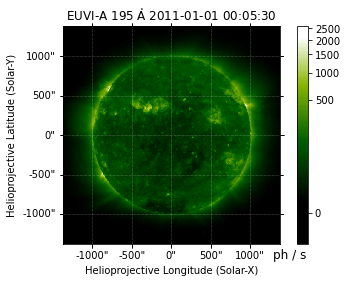

Spacecraft is STEREO for wavelength 195


,start,stop,datakey,filesize,instrument,WAVELNTH,CRLT_OBS,CRLN_OBS,RSUN
0,2011-01-01 00:05:30,2011-01-01 00:05:34,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_A_EUVI,195,-6.879440,341.089788,994.106101
1,2011-01-01 00:06:15,2011-01-01 00:06:19,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_A_EUVI,304,-6.879416,341.082945,994.106146
2,2011-01-01 00:06:16,2011-01-01 00:06:20,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_B_EUVI,195,6.766291,165.636672,905.986968
3,2011-01-01 00:07:01,2011-01-01 00:07:05,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_B_EUVI,304,6.766269,165.629755,905.987254
4,2011-01-01 00:10:30,2011-01-01 00:10:34,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_A_EUVI,195,-6.879278,341.044166,994.106402
...,...,...,...,...,...,...,...,...,...
1199,2011-01-02 23:46:16,2011-01-02 23:46:20,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_B_EUVI,195,6.677059,139.260061,907.086369
1200,2011-01-02 23:47:01,2011-01-02 23:47:05,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_B_EUVI,304,6.677035,139.253144,907.086659
1201,2011-01-02 23:51:16,2011-01-02 23:51:20,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_B_EUVI,195,6.676897,139.213951,907.088305
1202,2011-01-02 23:56:16,2011-01-02 23:56:20,s3://gov-nasa-hdrl-data1/contrib/euvml/l1/ster...,1074240,STEREO_B_EUVI,195,6.676735,139.167841,907.090242


In [2]:
hdul = astropy.io.fits.open(filelist[0])

euvml_map = sunpy.map.Map(hdul[0].data,hdul[0].header)
euvml_map.peek()

print(f"Spacecraft is {euvml_map.meta['TELESCOP']} for wavelength {euvml_map.meta['WAVELNTH']}")

file_registry1

# Streaming through files

Here are two streaming examples. The first runs a quick inline command using the API spec that guarantees the first four fields are s3key, start and stop times, and file size.  The second is a similar stream, in this case plotting the files.  Note in constructing the lambda that the 'stream' and 'stream_uri' commands mandate 4 variables be sent, but the catching functions can use or ignore any of them.   We send only the first ten files for this demo, but in a production setup you can send the entire filelist if desired.

In [3]:
cloud_endpoint.stream(file_registry1[:10], lambda s3key, start, stop, fsize: print(f"{hash(s3key.read())}\t{start}\t{stop}\t{fsize}"))

902965816137694189	2011-01-01 00:05:30	2011-01-01 00:05:34	1074240
-4725786382142297239	2011-01-01 00:06:15	2011-01-01 00:06:19	1074240
-5955646770103611881	2011-01-01 00:06:16	2011-01-01 00:06:20	1074240
4520122550605866577	2011-01-01 00:07:01	2011-01-01 00:07:05	1074240
502489607704207110	2011-01-01 00:10:30	2011-01-01 00:10:34	1074240
-7532224146184190650	2011-01-01 00:11:16	2011-01-01 00:11:20	1074240
-3874817547805200322	2011-01-01 00:14:00	2011-01-01 00:14:04	1074240
4091751162736154353	2011-01-01 00:14:46	2011-01-01 00:14:50	1074240
-1332759574351978071	2011-01-01 00:15:30	2011-01-01 00:15:34	1074240
-7771011123494154671	2011-01-01 00:16:15	2011-01-01 00:16:19	1074240


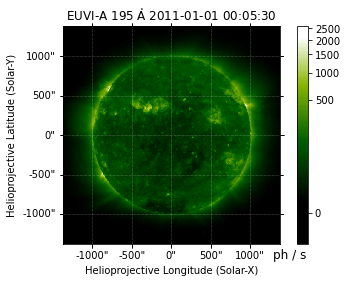

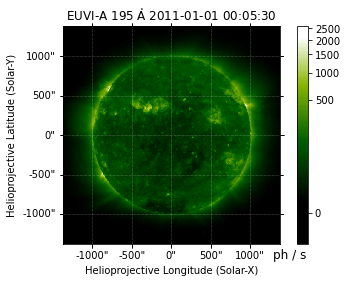

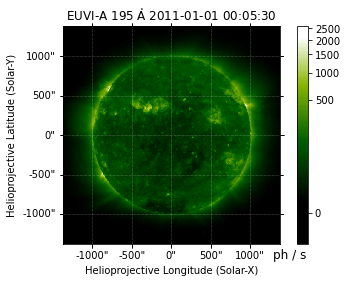

In [4]:
def plot_euvml(fname):
    hdul = astropy.io.fits.open(filelist[0])
    euvml_map = sunpy.map.Map(hdul[0].data,hdul[0].header)
    euvml_map.peek()

cloud_endpoint.stream_uri(file_registry1[:3], lambda fname, start, stop, fsize: plot_euvml(fname))

# Finding catalogs

You can do a search of the entire HelioCloud network to find what datasets exist.  Here we do searches on the ID, Title and keyword metadata within HelioCloud.  The last search, for example, will find all datasets tagged with '171' or '194' in their IDs, and finds AIA as well as our SOHO and STEREO datasets.

In [8]:
mysearch = cloudcatalog.EntireCatalogSearch()
print(f"Number of SOHO datasets, search by id: {len(mysearch.search_by_id('soho'))}")
print(f"\nIDs for all AIA datasets, search by title: {[s['id'] for s in mysearch.search_by_title('aia')]}")
print(f"\nIDs of all datasets whose id contain '193' or '194': {[s['id'] for s in mysearch.search_by_keywords(['193','194'])]}")
print(f"\nIDs of all 'euvml' datasets: {[s['id'] for s in mysearch.search_by_id('euvml')]}")

[
    GSFC HelioCloud Public Temp (us-east-1)
]


Number of SOHO datasets, search by id: 5

IDs for all AIA datasets, search by title: ['aia_0094', 'aia_0131', 'aia_0171', 'aia_0193', 'aia_0211', 'aia_0304', 'aia_0335', 'aia_1600', 'aia_1700']

IDs of all datasets whose id contain '193' or '194': ['aia_0193', 'euvml_soho_194', 'euvml_stereoa_194', 'euvml_stereob_194']

IDs of all 'euvml' datasets: ['euvml', 'euvml_soho', 'euvml_stereoa', 'euvml_stereob', 'euvml_171', 'euvml_195', 'euvml_284', 'euvml_304', 'euvml_soho_171', 'euvml_soho_194', 'euvml_soho_284', 'euvml_soho_304', 'euvml_stereoa_171', 'euvml_stereoa_194', 'euvml_stereoa_284', 'euvml_stereoa_304', 'euvml_stereob_171', 'euvml_stereob_194', 'euvml_stereob_284', 'euvml_stereob_304']
